In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# 1. Загрузка данных
transform = transforms.Compose([transforms.ToTensor()])
train_data = datasets.MNIST(root='.', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='.', train=False, download=True, transform=transform)

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64)

# 2. Модель
class SimpleNet(nn.Module):
    def __init__(self, activation='relu'):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 10)
        self.activation = activation

    def forward(self, x):
        x = x.view(-1, 28*28)
        if self.activation == 'relu':
            x = F.relu(self.fc1(x))
        elif self.activation == 'sigmoid':
            x = torch.sigmoid(self.fc1(x))
        elif self.activation == 'tanh':
            x = torch.tanh(self.fc1(x))
        x = self.fc2(x)
        return x

# 3. Обучение
def train(model, loader, optimizer, criterion, epochs=3):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for X, y in loader:
            optimizer.zero_grad()
            out = model(X)
            loss = criterion(out, y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}")

# 4. Запуск
model = SimpleNet(activation='tanh')  # попробуй 'sigmoid' и 'tanh'
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

print('tanh')
train(model, train_loader, optimizer, criterion, epochs=3)

tanh
Epoch 1, Loss: 318.4726
Epoch 2, Loss: 154.5110
Epoch 3, Loss: 109.6715


In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# 1. Загрузка данных
transform = transforms.Compose([transforms.ToTensor()])
train_data = datasets.MNIST(root='.', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='.', train=False, download=True, transform=transform)

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64)

# 2. Модель
class SimpleNet(nn.Module):
    def __init__(self, activation='relu'):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 10)
        self.activation = activation

    def forward(self, x):
        x = x.view(-1, 28*28)
        if self.activation == 'relu':
            x = F.relu(self.fc1(x))
        elif self.activation == 'sigmoid':
            x = torch.sigmoid(self.fc1(x))
        elif self.activation == 'tanh':
            x = torch.tanh(self.fc1(x))
        x = self.fc2(x)
        return x

# 3. Обучение
from tqdm import tqdm  # красиво отображает прогресс

def train(model, loader, optimizer, criterion, epochs=1):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        progress_bar = tqdm(loader, desc=f"Epoch {epoch+1}", leave=False)
        for X, y in progress_bar:
            optimizer.zero_grad()
            out = model(X)
            loss = criterion(out, y)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            progress_bar.set_postfix(loss=loss.item())

        print(f"Epoch {epoch+1}, Total Loss: {total_loss:.4f}")


# 4. Запуск
model = SimpleNet(activation='tanh')  # попробуй 'sigmoid' и 'tanh'
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

print('tanh')
train(model, train_loader, optimizer, criterion, epochs=3)

tanh


Epoch 1, Total Loss: 321.6652


Epoch 2, Total Loss: 157.7757


Epoch 3, Total Loss: 110.8620


In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# 1. Загрузка данных
transform = transforms.Compose([transforms.ToTensor()])
train_data = datasets.MNIST(root='.', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='.', train=False, download=True, transform=transform)

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64)

# 2. Модель
class SimpleNet(nn.Module):
    def __init__(self, activation='relu'):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 10)
        self.activation = activation

    def forward(self, x):
        x = x.view(-1, 28*28)
        if self.activation == 'relu':
            x = F.relu(self.fc1(x))
        elif self.activation == 'sigmoid':
            x = torch.sigmoid(self.fc1(x))
        elif self.activation == 'tanh':
            x = torch.tanh(self.fc1(x))
        x = self.fc2(x)
        return x

# 3. Обучение
loss_history = []

def train(model, loader, optimizer, criterion, epochs=1):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for X, y in tqdm(loader, desc=f"Epoch {epoch+1}"):
            optimizer.zero_grad()
            out = model(X)
            loss = criterion(out, y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        avg_loss = total_loss / len(loader)
        loss_history.append(avg_loss)
        print(f"Epoch {epoch+1}, Loss: {avg_loss:.4f}")


# 4. Запуск
model = SimpleNet(activation='sigmoid')  # попробуй 'sigmoid' и 'tanh'
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

print('tanh')
train(model, train_loader, optimizer, criterion, epochs=3)

tanh


Epoch 1: 100%|██████████| 938/938 [00:06<00:00, 142.44it/s]


Epoch 1, Loss: 0.5356


Epoch 2: 100%|██████████| 938/938 [00:06<00:00, 146.69it/s]


Epoch 2, Loss: 0.2294


Epoch 3: 100%|██████████| 938/938 [00:06<00:00, 149.15it/s]

Epoch 3, Loss: 0.1756


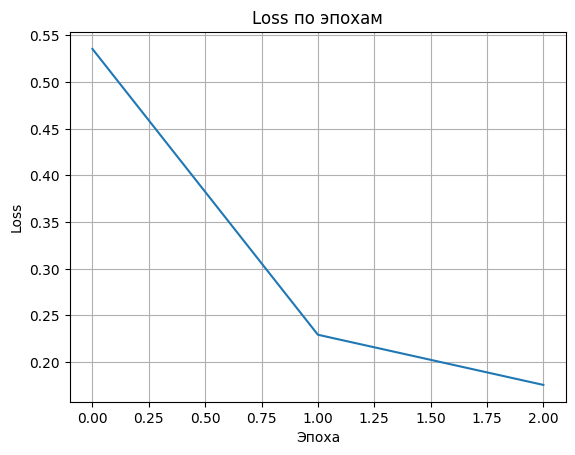

In [4]:
plt.plot(loss_history)
plt.title("Loss по эпохам")
plt.xlabel("Эпоха")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


=== Epoch 1 ===

Первые 10 предсказаний:
  Правильный = 0 	 Предсказание = 1
  Правильный = 7 	 Предсказание = 1
  Правильный = 1 	 Предсказание = 1
  Правильный = 6 	 Предсказание = 1
  Правильный = 3 	 Предсказание = 1
  Правильный = 7 	 Предсказание = 1
  Правильный = 7 	 Предсказание = 1
  Правильный = 6 	 Предсказание = 1
  Правильный = 7 	 Предсказание = 1
  Правильный = 3 	 Предсказание = 1

Последние 10 предсказаний:
  Правильный = 7 	 Предсказание = 7
  Правильный = 9 	 Предсказание = 9
  Правильный = 7 	 Предсказание = 7
  Правильный = 7 	 Предсказание = 7
  Правильный = 2 	 Предсказание = 2
  Правильный = 5 	 Предсказание = 5
  Правильный = 6 	 Предсказание = 6
  Правильный = 1 	 Предсказание = 1
  Правильный = 1 	 Предсказание = 1
  Правильный = 3 	 Предсказание = 3
Loss: 497.1078 | Accuracy: 87.11%

=== Epoch 2 ===

Первые 10 предсказаний:
  Правильный = 3 	 Предсказание = 3
  Правильный = 9 	 Предсказание = 9
  Правильный = 5 	 Предсказание = 5
  Правильный = 9 	 Предска

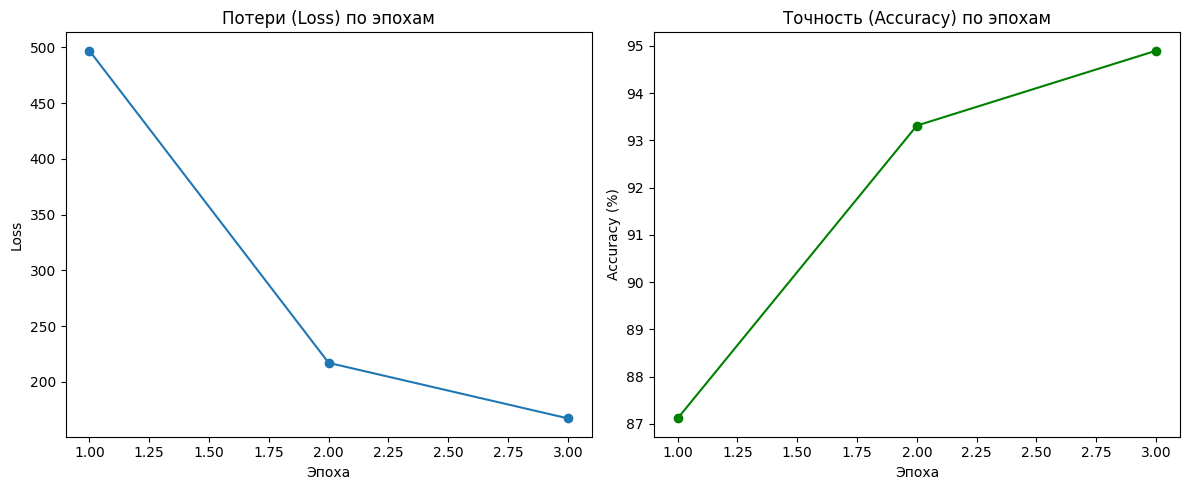

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# 1. Загрузка данных
transform = transforms.Compose([transforms.ToTensor()])
train_data = datasets.MNIST(root='.', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='.', train=False, download=True, transform=transform)

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64)

# 2. Модель
class SimpleNet(nn.Module):
    def __init__(self, activation='relu'):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 10)
        self.activation = activation

    def forward(self, x):
        x = x.view(-1, 28*28)
        if self.activation == 'relu':
            x = F.relu(self.fc1(x))
        elif self.activation == 'sigmoid':
            x = torch.sigmoid(self.fc1(x))
        elif self.activation == 'tanh':
            x = torch.tanh(self.fc1(x))
        x = self.fc2(x)
        return x

# 3. Обучение
def train(model, loader, optimizer, criterion, epochs=3):
    model.train()
    loss_history = []
    accuracy_history = []

    for epoch in range(epochs):
        total_loss = 0
        correct = 0
        total = 0

        print(f"\n=== Epoch {epoch + 1} ===")
        for i, (X, y) in enumerate(loader):
            optimizer.zero_grad()
            out = model(X)
            loss = criterion(out, y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

            # Подсчёт accuracy
            predicted = torch.argmax(out, dim=1)
            correct += (predicted == y).sum().item()
            total += y.size(0)

            # Печатаем первые и последние 10 предсказаний только 1 раз за эпоху
            if i == 0:
                print("\nПервые 10 предсказаний:")
                for real, pred in zip(y[:10], predicted[:10]):
                    print(f"  Правильный = {real.item()} \t Предсказание = {pred.item()}")
            elif i == len(loader) - 1:
                print("\nПоследние 10 предсказаний:")
                for real, pred in zip(y[:10], predicted[:10]):
                    print(f"  Правильный = {real.item()} \t Предсказание = {pred.item()}")

        avg_loss = total_loss
        accuracy = correct / total
        loss_history.append(avg_loss)
        accuracy_history.append(accuracy)

        print(f"Loss: {avg_loss:.4f} | Accuracy: {accuracy * 100:.2f}%")

    return loss_history, accuracy_history





# 4. Запуск
model = SimpleNet(activation='sigmoid')  # попробуй 'relu', 'sigmoid' или 'tanh'
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

loss_hist, acc_hist = train(model, train_loader, optimizer, criterion, epochs=3)

# 5. Графики
epochs = range(1, len(loss_hist) + 1)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss_hist, marker='o')
plt.title("Потери (Loss) по эпохам")
plt.xlabel("Эпоха")
plt.ylabel("Loss")

plt.subplot(1, 2, 2)
plt.plot(epochs, [a * 100 for a in acc_hist], marker='o', color='green')
plt.title("Точность (Accuracy) по эпохам")
plt.xlabel("Эпоха")
plt.ylabel("Accuracy (%)")

plt.tight_layout()
plt.show()